In [2]:
# Jupyter "magic methods" -- only need to be run once per kernel restart
%load_ext autoreload
%aimport helpers
%autoreload 1

In [18]:
# import python modules -- this cell needs to be run again if you make changes to any of the files
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg.norm as norm
import time

from helpers import show_model
from pomegranate import State, HiddenMarkovModel, DiscreteDistribution, NormalDistribution

We consider a toy example with n=4 hidden states, whose outputs are univariate Gaussians, $\mathcal{N}(\mu,\sigma_i^2)$, with $\mathbf{A}$ and $\theta$ given by 

\begin{equation*}
\mathbf{A} =  \begin{matrix}
0.7 &  0.0 & 0.2 & 0.5 \\
0.2 &  0.6 & 0.2 & 0.0 \\
0.1 &  0.2 & 0.6 & 0.0 \\
0.0 &  0.2 & 0.0 & 0.5 \\
\end{matrix}
\end{equation*}

$f_{\theta_1} = \mathcal{N}(-4,4)$, $\quad $ $f_{\theta_2} = \mathcal{N}(0,1)$,$\quad $  $f_{\theta_3} = \mathcal{N}(2,36)$,$\quad $  $f_{\theta_4} = \mathcal{N}(4,1)$

In [26]:
gt_model = HiddenMarkovModel(name = "Toy model")

# emission probability distributions
theta_dists = [NormalDistribution(-4, 4), NormalDistribution(0, 1), NormalDistribution(2, 36),NormalDistribution(4,1)]
trans_mat = np.array([[0.7, 0.0, 0.2, 0.5],
                      [0.2, 0.6, 0.2, 0.0],
                      [0.1, 0.2, 0.6, 0.0],
                      [0.0, 0.2, 0.0, 0.5],
                     ]).transpose()
# starts = np.array([1.0, 0.0, 0.0, 0.0])
starts = np.array([0.25, 0.25, 0.25, 0.25])
ends = np.array([0.0, 0.0 ,0.0, 0.0])

gt_model = HiddenMarkovModel.from_matrix(trans_mat, theta_dists, starts, ends)

In [28]:

num_samples = 5000
keep_path = False
random_seed = 0
t = time.time()
samples = gt_model.sample(n = num_samples, length = 10, path = keep_path, random_state = 1)
elapsed = time.time() - t
print("Elapsed time is: ", elapsed, " sec")

Elapsed time is:  0.4430999755859375


In [ ]:
fitted_model = HiddenMarkovModel(name = "Fitted Toy model")
t = time.time()
fitted_model = fitted_model.from_samples(NormalDistribution, n_components=4, X=samples)
elapsed = time.time() - t
print("Elapsed time is: ", elapsed)

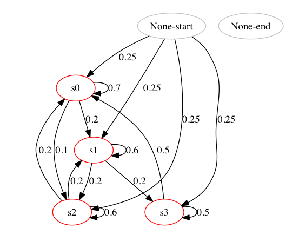

In [27]:
gt_model.plot()

In [ ]:
fitted_model.plot()

In [21]:
# there are six edges for each state
fitted_model.dense_transition_matrix()

array([[6.97590814e-01, 9.04809460e-03, 1.99858799e-01, 9.35022926e-02,
        0.00000000e+00, 0.00000000e+00],
       [1.62621982e-01, 2.49994732e-01, 2.76888311e-01, 3.10494976e-01,
        0.00000000e+00, 0.00000000e+00],
       [2.48782234e-01, 3.64340879e-03, 6.52876394e-01, 9.46979637e-02,
        0.00000000e+00, 0.00000000e+00],
       [4.06607728e-01, 6.83645325e-17, 1.98714099e-01, 3.94678173e-01,
        0.00000000e+00, 0.00000000e+00],
       [5.78061000e-01, 7.97814521e-03, 2.42312397e-01, 1.71648458e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])